<a href="https://colab.research.google.com/github/Sugam1530/DeepFER/blob/main/DeepFER_Facial_Emotion_Recognition_Using_Deep_Learning_Deep_Learning_for_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project name - DeepFER: Facial Emotion Recognition Using Deep Learning Deep Learning for Computer Vision

# Project Summary -

The DeepFER project is an end-to-end deep learning-based system designed to recognize and classify human facial emotions from images. This application has practical use cases in domains such as mental health assessment, customer experience analysis, human-computer interaction, and surveillance. The project employs modern computer vision techniques and transfer learning using a convolutional neural network (CNN) architecture to enhance emotion detection performance.

Objective
The primary goal of this project is to build a robust model that accurately identifies facial emotions from input images, classifying them into one of seven predefined emotion categories: angry, disgust, fear, happy, neutral, sad, and surprise. The project leverages transfer learning from a pre-trained CNN model (MobileNetV2) to address challenges related to limited training data, computational constraints, and model generalization.

Dataset
The dataset used comprises 28,821 training images and 7,066 validation images, organized into folders by class labels. Each image contains a face with one of the target emotions, and the dataset is balanced across classes to ensure effective learning. The images are resized to 224x224 pixels and normalized for consistency with the input format expected by MobileNetV2.

Methodology
The project follows these key steps:

Data Preprocessing: Images are resized, normalized, and augmented to improve model generalization. The dataset is split into training and validation sets using ImageDataGenerator.

Model Building: The base of the model is MobileNetV2, pre-trained on ImageNet. The top layers are customized with a global average pooling layer, a dropout layer to reduce overfitting, and a fully connected output layer with softmax activation for classification.

Training: The model is compiled with Adam optimizer and sparse_categorical_crossentropy loss. It is trained with early stopping and model checkpointing, ensuring the best-performing model on the validation set is retained.

Evaluation: The trained model is evaluated on the validation set using metrics like accuracy, precision, recall, F1-score, and confusion matrix. This provides insights into the performance per class and helps identify areas needing improvement.

Prediction Interface: A prediction function allows users to upload an image and receive the predicted emotion. The image is preprocessed similarly to training data before being passed to the model for inference.

Results
After implementing transfer learning and training for several epochs, the model achieved a notable improvement in validation accuracy compared to baseline models. Despite inherent difficulties in distinguishing similar emotions like “fear” and “sad,” the model performed well on more expressive categories such as “happy” and “surprise.” Evaluation metrics and confusion matrix highlighted class-wise performance and were used to refine the model further.

**GitHub Link**

In [1]:
import os
import zipfile
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
import random
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
# Skip if already extracted
zip_path = '/content/Face Emotion Recognition Dataset.zip'
extract_path = '/content/Face_Emotion_Recognition_Dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
train_dir = "/content/Face_Emotion_Recognition_Dataset/images/train"
val_dir = "/content/Face_Emotion_Recognition_Dataset/images/validation"

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=20,           # Rotate images
    width_shift_range=0.2,       # Shift width
    height_shift_range=0.2,      # Shift height
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Zoom in
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill missing pixels
)

# Validation data generator (no augmentation, only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Image size and batch size
img_size = (48, 48)
batch_size = 32

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
print("Class indices:", train_generator.class_indices)

Class indices: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [7]:
from tensorflow.keras.layers import Lambda

# Define input shape
input_shape = (48, 48, 1)  # Since original images are grayscale

# Create a base model from MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze base model
base_model.trainable = False

# Custom top layers
inputs = Input(shape=input_shape)
x = tf.keras.layers.Rescaling(1./255)(inputs)

# Convert grayscale (1 channel) to RGB (3 channels)
x = Lambda(lambda image: tf.image.grayscale_to_rgb(image))(x)

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)

# Final model
model = Model(inputs, outputs)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


<ipython-input-7-81bf8e9905e2>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Load datasets using image_dataset_from_directory
img_size = (48, 48)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode='categorical',
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

# Step 2: Optimize performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Step 3: Define CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(48, 48, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Set callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Step 5: Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint, earlystop]
)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.2466 - loss: 1.8180

901/901 ━━━━━━━━━━━━━━━━━━━━ 116s 120ms/step - accuracy: 0.2466 - loss: 1.8179 - val_accuracy: 0.3617 - val_loss: 1.6414
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3919 - loss: 1.5590

901/901 ━━━━━━━━━━━━━━━━━━━━ 139s 124ms/step - accuracy: 0.3919 - loss: 1.5589 - val_accuracy: 0.4733 - val_loss: 1.3780
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.4559 - loss: 1.4014

901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 0.4559 - loss: 1.4013 - val_accuracy: 0.5103 - val_loss: 1.2940
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4917 - loss: 1.3156

901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.4917 - loss: 1.3156 - val_accuracy: 0.5270 - val_loss: 1.2400
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5316 - loss: 1.2376

901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.5316 - loss: 1.2376 - val_accuracy: 0.5307 - val_loss: 1.2302
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5409 - loss: 1.2042

901/901 ━━━━━━━━━━━━━━━━━━━━ 142s 122ms/step - accuracy: 0.5409 - loss: 1.2042 - val_accuracy: 0.5501 - val_loss: 1.1922
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5664 - loss: 1.1325

901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 120ms/step - accuracy: 0.5663 - loss: 1.1325 - val_accuracy: 0.5563 - val_loss: 1.1856
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5772 - loss: 1.0988

901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 119ms/step - accuracy: 0.5772 - loss: 1.0988 - val_accuracy: 0.5617 - val_loss: 1.1805
Epoch 9/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - accuracy: 0.5981 - loss: 1.0502 - val_accuracy: 0.5613 - val_loss: 1.1823
Epoch 10/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6116 - loss: 1.0088

901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 125ms/step - accuracy: 0.6116 - loss: 1.0088 - val_accuracy: 0.5627 - val_loss: 1.1977
Epoch 11/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 118ms/step - accuracy: 0.6276 - loss: 0.9680 - val_accuracy: 0.5617 - val_loss: 1.2082
Epoch 12/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.6452 - loss: 0.9271 - val_accuracy: 0.5616 - val_loss: 1.1986
Epoch 13/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6495 - loss: 0.9037

901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 0.6495 - loss: 0.9037 - val_accuracy: 0.5665 - val_loss: 1.2233
Epoch 14/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6675 - loss: 0.8564

901/901 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.6675 - loss: 0.8564 - val_accuracy: 0.5695 - val_loss: 1.2542
Epoch 15/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 142s 124ms/step - accuracy: 0.6740 - loss: 0.8384 - val_accuracy: 0.5610 - val_loss: 1.2701
Epoch 16/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 140s 123ms/step - accuracy: 0.6862 - loss: 0.8122 - val_accuracy: 0.5620 - val_loss: 1.3023
Epoch 17/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 120ms/step - accuracy: 0.6968 - loss: 0.7697 - val_accuracy: 0.5610 - val_loss: 1.3237
Epoch 18/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 119ms/step - accuracy: 0.7073 - loss: 0.7423 - val_accuracy: 0.5645 - val_loss: 1.3753
Epoch 19/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.7141 - loss: 0.7236 - val_accuracy: 0.5592 - val_loss: 1.4431


In [9]:
# Evaluate the model using the validation set (acting as test set)
test_ds = val_ds  # reuse validation data as test

test_loss, test_accuracy = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.5137 - loss: 1.3908

✅ Test Accuracy: 0.5695
✅ Test Loss: 1.2542


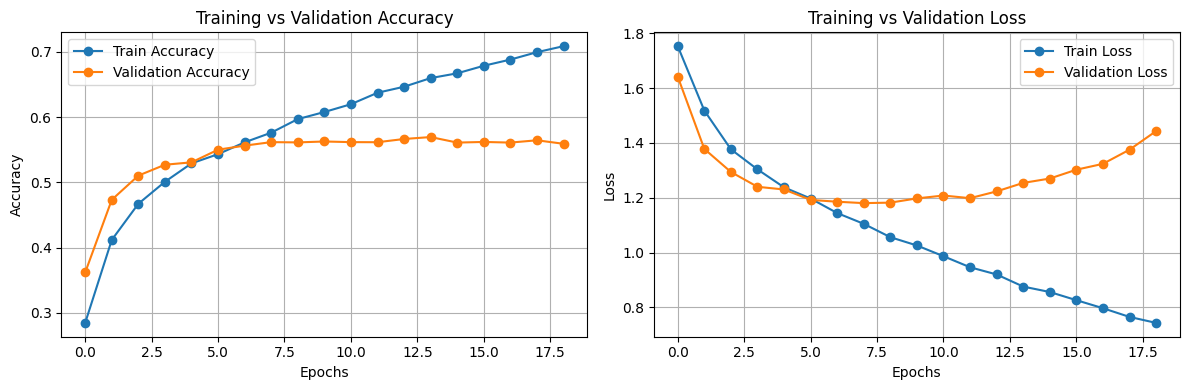

In [10]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# Define image parameters again if not already defined
img_height = 48
img_width = 48
batch_size = 32

# Recreate val_ds to extract class names
temp_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = temp_ds.class_names


Found 7066 files belonging to 7 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━

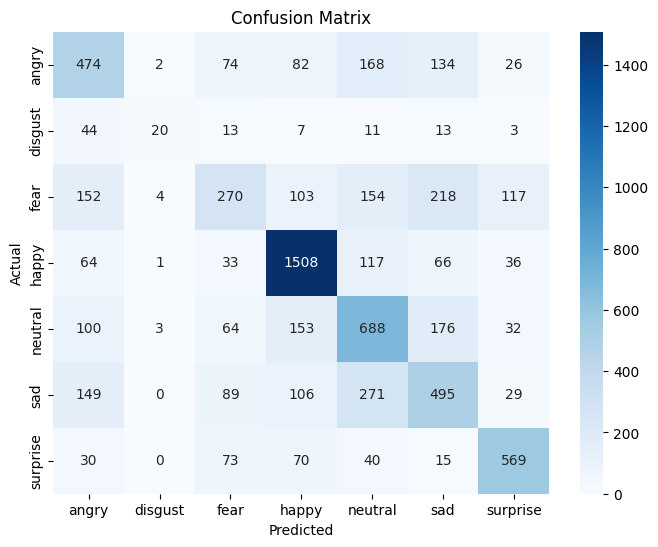


Classification Report:

              precision    recall  f1-score   support

       angry       0.47      0.49      0.48       960
     disgust       0.67      0.18      0.28       111
        fear       0.44      0.27      0.33      1018
       happy       0.74      0.83      0.78      1825
     neutral       0.47      0.57      0.52      1216
         sad       0.44      0.43      0.44      1139
    surprise       0.70      0.71      0.71       797

    accuracy                           0.57      7066
   macro avg       0.56      0.50      0.51      7066
weighted avg       0.56      0.57      0.56      7066



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predictions
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))  # Convert one-hot to class index
    y_pred.extend(np.argmax(preds, axis=1))           # Already in class index format

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [13]:
!pip install opencv-python

In [14]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Load pre-trained model
emotion_model = model  # Or load from disk if needed

# Define emotion labels (class_names)
emotion_labels = class_names  # Must match your training order

# Initialize OpenCV face detector
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_color = frame[y:y+h, x:x+w]
        roi_resized = cv2.resize(roi_color, (img_width, img_height))
        roi_normalized = roi_resized / 255.0
        roi_reshaped = np.expand_dims(roi_normalized, axis=0)

        prediction = emotion_model.predict(roi_reshaped)
        label = emotion_labels[np.argmax(prediction)]

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

    cv2.imshow('Real-time Facial Emotion Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Saving 665.jpg to 665.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Emotion: angry


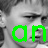

In [15]:
from google.colab.patches import cv2_imshow
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    img = cv2.imread(filename)
    img_resized = cv2.resize(img, (img_width, img_height))
    img_normalized = img_resized / 255.0
    img_reshaped = np.expand_dims(img_normalized, axis=0)

    prediction = emotion_model.predict(img_reshaped)
    label = emotion_labels[np.argmax(prediction)]
    print(f"Predicted Emotion: {label}")

    cv2.putText(img, label, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2_imshow(img)

In [16]:
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Match training color mode

# Optional: Crop face only (if needed, use HaarCascade)
img_resized = cv2.resize(img, (img_width, img_height))
img_normalized = img_resized / 255.0
img_expanded = np.expand_dims(img_normalized, axis=0)  # Shape: (1, 48, 48, 3)

# Predict
pred = emotion_model.predict(img_expanded)
print("Predicted:", emotion_labels[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted: angry


Improving model performance

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image size and batch size
img_height, img_width = 48, 48
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Create training and validation generators
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

val_ds = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Get class names
class_names = list(train_ds.class_indices.keys())
print("Class Names:", class_names)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Class Names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [18]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

# Load base model (without top)
base_model = MobileNetV2(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')
base_model.trainable = False  # Freeze base layers

# Add custom head
inputs = Input(shape=(img_height, img_width, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(7, activation='softmax')(x)  # 7 classes

model = Model(inputs, outputs)

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()

<ipython-input-18-3ef66294ca20>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.2505 - loss: 2.0590

901/901 ━━━━━━━━━━━━━━━━━━━━ 143s 143ms/step - accuracy: 0.2505 - loss: 2.0588 - val_accuracy: 0.3404 - val_loss: 1.7220
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3127 - loss: 1.7717

901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.3126 - loss: 1.7717 - val_accuracy: 0.3470 - val_loss: 1.6847
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 117ms/step - accuracy: 0.3134 - loss: 1.7608 - val_accuracy: 0.3436 - val_loss: 1.6946
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.3160 - loss: 1.7442 - val_accuracy: 0.3442 - val_loss: 1.6879
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.3209 - loss: 1.7446 - val_accuracy: 0.3450 - val_loss: 1.6747
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 144s 122ms/step - accuracy: 0.3166 - loss: 1.7433 - val_accuracy: 0.3418 - val_loss: 1.6636
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3195 - loss: 1.7472

901/901 ━━━━━━━━━━━━━━━━━━━━ 112s 124ms/step - accuracy: 0.3195 - loss: 1.7472 - val_accuracy: 0.3479 - val_loss: 1.6566
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3179 - loss: 1.7465

901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.3179 - loss: 1.7465 - val_accuracy: 0.3513 - val_loss: 1.6568
Epoch 9/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 119ms/step - accuracy: 0.3123 - loss: 1.7441 - val_accuracy: 0.3452 - val_loss: 1.6699
Epoch 10/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3161 - loss: 1.7494

901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.3161 - loss: 1.7494 - val_accuracy: 0.3564 - val_loss: 1.6572


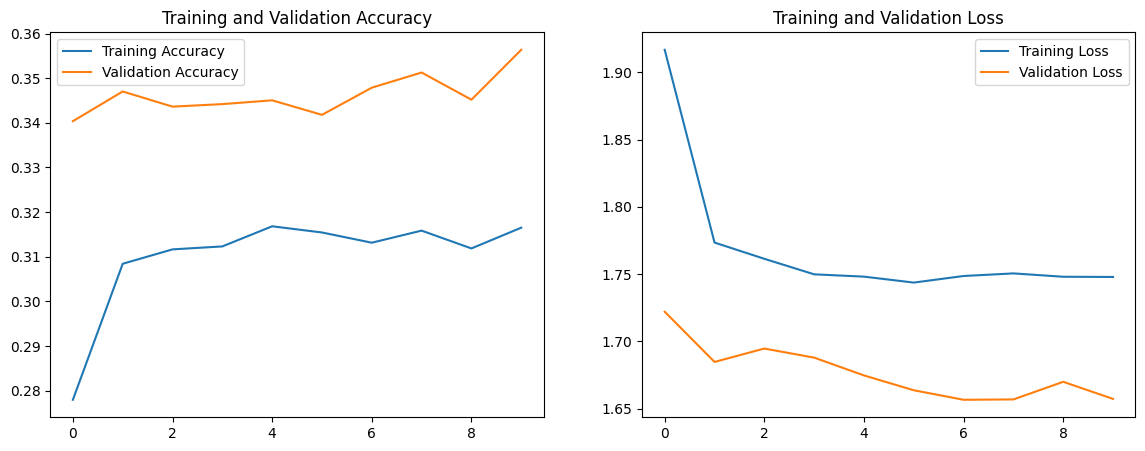

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [21]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.2807 - loss: 1.8263

Validation Accuracy: 0.3479
Validation Loss: 1.6566


Found 7066 files belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step

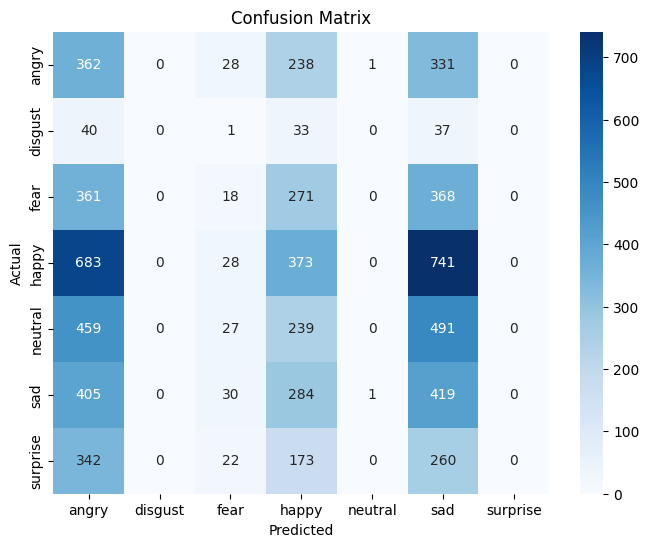


Classification Report:

              precision    recall  f1-score   support

       angry       0.14      0.38      0.20       960
     disgust       0.00      0.00      0.00       111
        fear       0.12      0.02      0.03      1018
       happy       0.23      0.20      0.22      1825
     neutral       0.00      0.00      0.00      1216
         sad       0.16      0.37      0.22      1139
    surprise       0.00      0.00      0.00       797

    accuracy                           0.17      7066
   macro avg       0.09      0.14      0.10      7066
weighted avg       0.12      0.17      0.12      7066



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Re-create dataset for extracting true labels
temp_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

class_names = temp_ds.class_names

# Gather predictions and true labels
y_true = []
y_pred = []

for images, labels in temp_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = (img_height, img_width, 3)

# Load MobileNetV2 base model (without top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze base

# Build head model on top
inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs, outputs)

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

<ipython-input-23-a2e7dcec6f87>:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_shape = (img_height, img_width, 3)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False

inputs = Input(shape=input_shape)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

<ipython-input-24-26b41ea936ea>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │         8,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint, earlystop]
)

Epoch 1/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2025 - loss: 2.2980
Epoch 1: val_accuracy improved from -inf to 0.29182, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 122s 126ms/step - accuracy: 0.2025 - loss: 2.2979 - val_accuracy: 0.2918 - val_loss: 1.8496
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.2519 - loss: 2.0007
Epoch 2: val_accuracy improved from 0.29182 to 0.32196, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 114s 126ms/step - accuracy: 0.2519 - loss: 2.0006 - val_accuracy: 0.3220 - val_loss: 1.7697
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.2690 - loss: 1.8960
Epoch 3: val_accuracy improved from 0.32196 to 0.32649, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 119ms/step - accuracy: 0.2690 - loss: 1.8960 - val_accuracy: 0.3265 - val_loss: 1.7288
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2844 - loss: 1.8315
Epoch 4: val_accuracy improved from 0.32649 to 0.33895, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.2844 - loss: 1.8315 - val_accuracy: 0.3389 - val_loss: 1.6825
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.2984 - loss: 1.8016
Epoch 5: val_accuracy improved from 0.33895 to 0.34447, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 120ms/step - accuracy: 0.2984 - loss: 1.8016 - val_accuracy: 0.3445 - val_loss: 1.6815
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3083 - loss: 1.7536
Epoch 6: val_accuracy improved from 0.34447 to 0.34574, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 108s 119ms/step - accuracy: 0.3084 - loss: 1.7536 - val_accuracy: 0.3457 - val_loss: 1.6639
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3124 - loss: 1.7408
Epoch 7: val_accuracy improved from 0.34574 to 0.34673, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 113s 126ms/step - accuracy: 0.3124 - loss: 1.7408 - val_accuracy: 0.3467 - val_loss: 1.6509
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3199 - loss: 1.7103
Epoch 8: val_accuracy improved from 0.34673 to 0.35423, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 111s 123ms/step - accuracy: 0.3199 - loss: 1.7103 - val_accuracy: 0.3542 - val_loss: 1.6324
Epoch 9/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3276 - loss: 1.7041
Epoch 9: val_accuracy did not improve from 0.35423
901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 117ms/step - accuracy: 0.3276 - loss: 1.7041 - val_accuracy: 0.3539 - val_loss: 1.6367
Epoch 10/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3245 - loss: 1.6890
Epoch 10: val_accuracy improved from 0.35423 to 0.35706, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 109s 121ms/step - accuracy: 0.3245 - loss: 1.6890 - val_accuracy: 0.3571 - val_loss: 1.6223
Epoch 11/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3311 - loss: 1.6793
Epoch 11: val_accuracy improved from 0.35706 to 0.36131, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 106s 118ms/step - accuracy: 0.3311 - loss: 1.6793 - val_accuracy: 0.3613 - val_loss: 1.6152
Epoch 12/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3352 - loss: 1.6672
Epoch 12: val_accuracy did not improve from 0.36131
901/901 ━━━━━━━━━━━━━━━━━━━━ 148s 125ms/step - accuracy: 0.3352 - loss: 1.6672 - val_accuracy: 0.3582 - val_loss: 1.6233
Epoch 13/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.3356 - loss: 1.6681
Epoch 13: val_accuracy did not improve from 0.36131
901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 119ms/step - accuracy: 0.3356 - loss: 1.6681 - val_accuracy: 0.3566 - val_loss: 1.6244
Epoch 14/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.3383 - loss: 1.6703
Epoch 14: val_accuracy improved from 0.36131 to 0.36640, saving model to best_model.h5


901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.3383 - loss: 1.6703 - val_accuracy: 0.3664 - val_loss: 1.6089
Epoch 15/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3418 - loss: 1.6615
Epoch 15: val_accuracy did not improve from 0.36640
901/901 ━━━━━━━━━━━━━━━━━━━━ 110s 122ms/step - accuracy: 0.3418 - loss: 1.6615 - val_accuracy: 0.3572 - val_loss: 1.6160
Epoch 16/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3389 - loss: 1.6577
Epoch 16: val_accuracy did not improve from 0.36640
901/901 ━━━━━━━━━━━━━━━━━━━━ 114s 127ms/step - accuracy: 0.3389 - loss: 1.6577 - val_accuracy: 0.3605 - val_loss: 1.6128
Epoch 17/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.3381 - loss: 1.6672
Epoch 17: val_accuracy did not improve from 0.36640
901/901 ━━━━━━━━━━━━━━━━━━━━ 107s 119ms/step - accuracy: 0.3381 - loss: 1.6672 - val_accuracy: 0.3576 - val_loss: 1.6206
Epoch 18/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3363 - loss: 1.6523
Epoc

In [26]:
from tensorflow.keras.models import load_model

emotion_model = load_model('best_model.h5')


In [27]:
val_loss, val_accuracy = emotion_model.evaluate(val_ds)
print("Validation Accuracy:", val_accuracy)

221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.2858 - loss: 1.7803
Validation Accuracy: 0.3664024770259857


In [38]:
from google.colab import files
uploaded = files.upload()

# Get filename
import os
filename = list(uploaded.keys())[0]

Saving 873.jpg to 873 (1).jpg


In [39]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array

# Read and preprocess image
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img, (img_width, img_height))
img_normalized = img_resized / 255.0
img_expanded = np.expand_dims(img_normalized, axis=0)

# Predict
pred = emotion_model.predict(img_expanded)
predicted_label = class_names[np.argmax(pred)]
print("Predicted Emotion:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Emotion: happy
